##Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://bigml.com/user/jbosca/gallery/dataset/5a7def3d2a83476e09000456#info) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted. 

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
#from xverse.transformer import MonotonicBinning,WOE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
plt.style.use("fivethirtyeight")
%matplotlib inline
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

### Load the dataset

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('/content/GiveMeSomeCredit.csv')
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

#df_target=pd.DataFrame(data=boston.target, columns=['Target'])
type(boston)
#sklearn.utils.Bunch
boston.keys()

#Data
#pd.DataFrame(boston.data).head()
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
%matplotlib inline
boston.data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:

dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
#all the independant variables/predictors are named as dfx
dfy = pd.DataFrame(boston.target, columns = ['target'])
#the dependant variable/outcome is the target and it is named as dfy
dfcombine = dfx.join(dfy)
#both the dataframes are combined and named as dfcombine
#let us view and examine the head of the combined dataframe
dfcombine.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


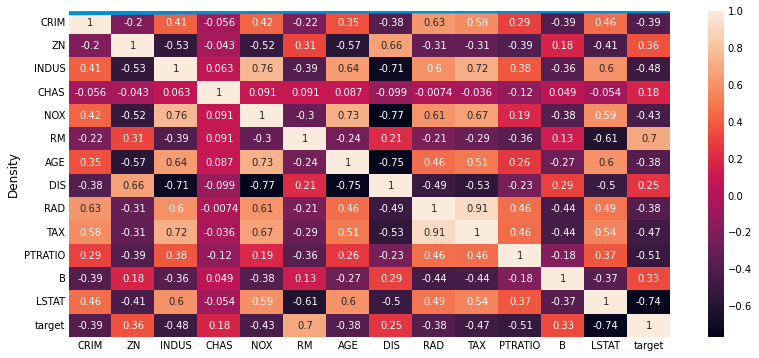

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy)

linR = LinearRegression()

linR.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be 71% 
linR.score(X_test,y_test)
0.7112260057484953
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

**Some of the observations are:**

1. There are 150,000 rows for 11 features in our data.
2. In the data, that all the datatypes belong to a numeric class i.e. int and float.
3. Columns MonthlyIncome and NumberOfDependents have some null values.

#### Describe the all statistical properties of the train dataset

In [ ]:
# YOUR CODE HERE
print("The statistical properties of the dataset")
df.describe()

The statistical properties of the dataset


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


**From here we can conclude that the column Unnamed: 0 will have no significance in the predictive modelling because it represents ID of the customer.**
**Looking at the 'Age' variable, it is easy to detect outliers resulting from incorrect data. The minimum and maximum ages are 2.9, and 100, respectively.**

### Pre-processing

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
# YOUR CODE HERE
print("The null vaules in the data set:")
df.isnull().sum()

The null vaules in the data set:


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
median_value_MonthlyIncome = df['MonthlyIncome'].median()
print(" The median of Monthly Income is:", median_value_MonthlyIncome)
# mean of values in the same column
df['MonthlyIncome'].fillna(value = median_value_MonthlyIncome, inplace=True)
df['NumberOfDependents'].fillna(value = 0, inplace=True) #can add mode value
print('Updated Dataset:')
df

 The median of Monthly Income is: 5400.0
Updated Dataset:


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### EDA &  Visualization

#### Calculate the percentage of the target lebels and visualize with a graph

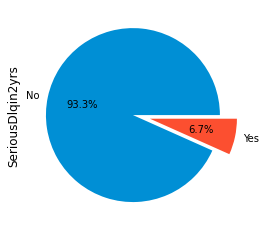

In [ ]:
# YOUR CODE HERE

labels = 'No', 'Yes'
explode = (0, 0.2)
df['SeriousDlqin2yrs'].value_counts().plot(kind = 'pie', explode=explode, labels=labels, autopct='%1.1f%%')

In [ ]:
df1 = df['SeriousDlqin2yrs'].value_counts()
print("The count of the target lebels: \n", df1)
print("The percentage of the target lebels")
df1 = (df1/ len(df['SeriousDlqin2yrs']))*100
df1

The count of the target lebels: 
 0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64
The percentage of the target lebels


0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

**We have an event rate of 6.68%, consequences of having this kind of target class is most likely that the minority class is being ignored by the algorithm and will predict the new instances to class_0 as it was the safest way to have a great accuracy.**

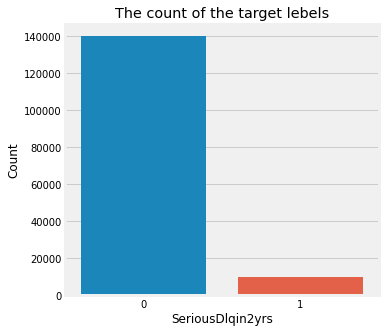

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="SeriousDlqin2yrs", data = df)
ax.set(xlabel = 'SeriousDlqin2yrs')
ax.set(ylabel = 'Count')
ax.set(title ='The count of the target lebels')
plt.show()


**The ratio of negative to positive delinquency outliers are found to be 93.3% to 6.7%, which is approximately a ratio of 14:1. Therefore, our dataset is highly imbalanced. We cannot rely on the accuracy scores to predict the model's success.**

#### Plot the distribution of SeriousDlqin2yrs by age

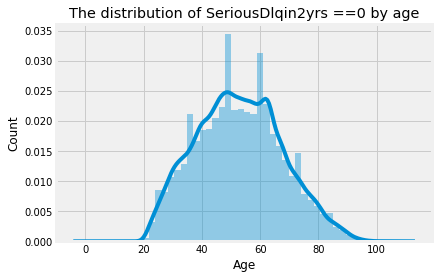

In [ ]:
# YOUR CODE HERE, hue can be used for both the categories
ax = sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 0]["age"])
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("The distribution of SeriousDlqin2yrs ==0 by age")
plt.show()

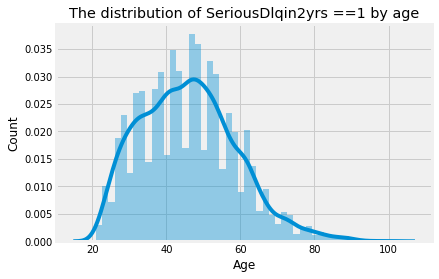

In [ ]:
ax = sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 1]["age"])
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("The distribution of SeriousDlqin2yrs ==1 by age")
plt.show()

**The above distribution states almost normal distribution, but still marginally right skewed showing outliers in the age variable.**

In [ ]:
df.loc[df["age"] < 18] #less than legal age

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


**Only one instance with age = 0, let's impute it right away.**

In [ ]:
df.loc[df["age"] == 0, "age"] = df.age.median()

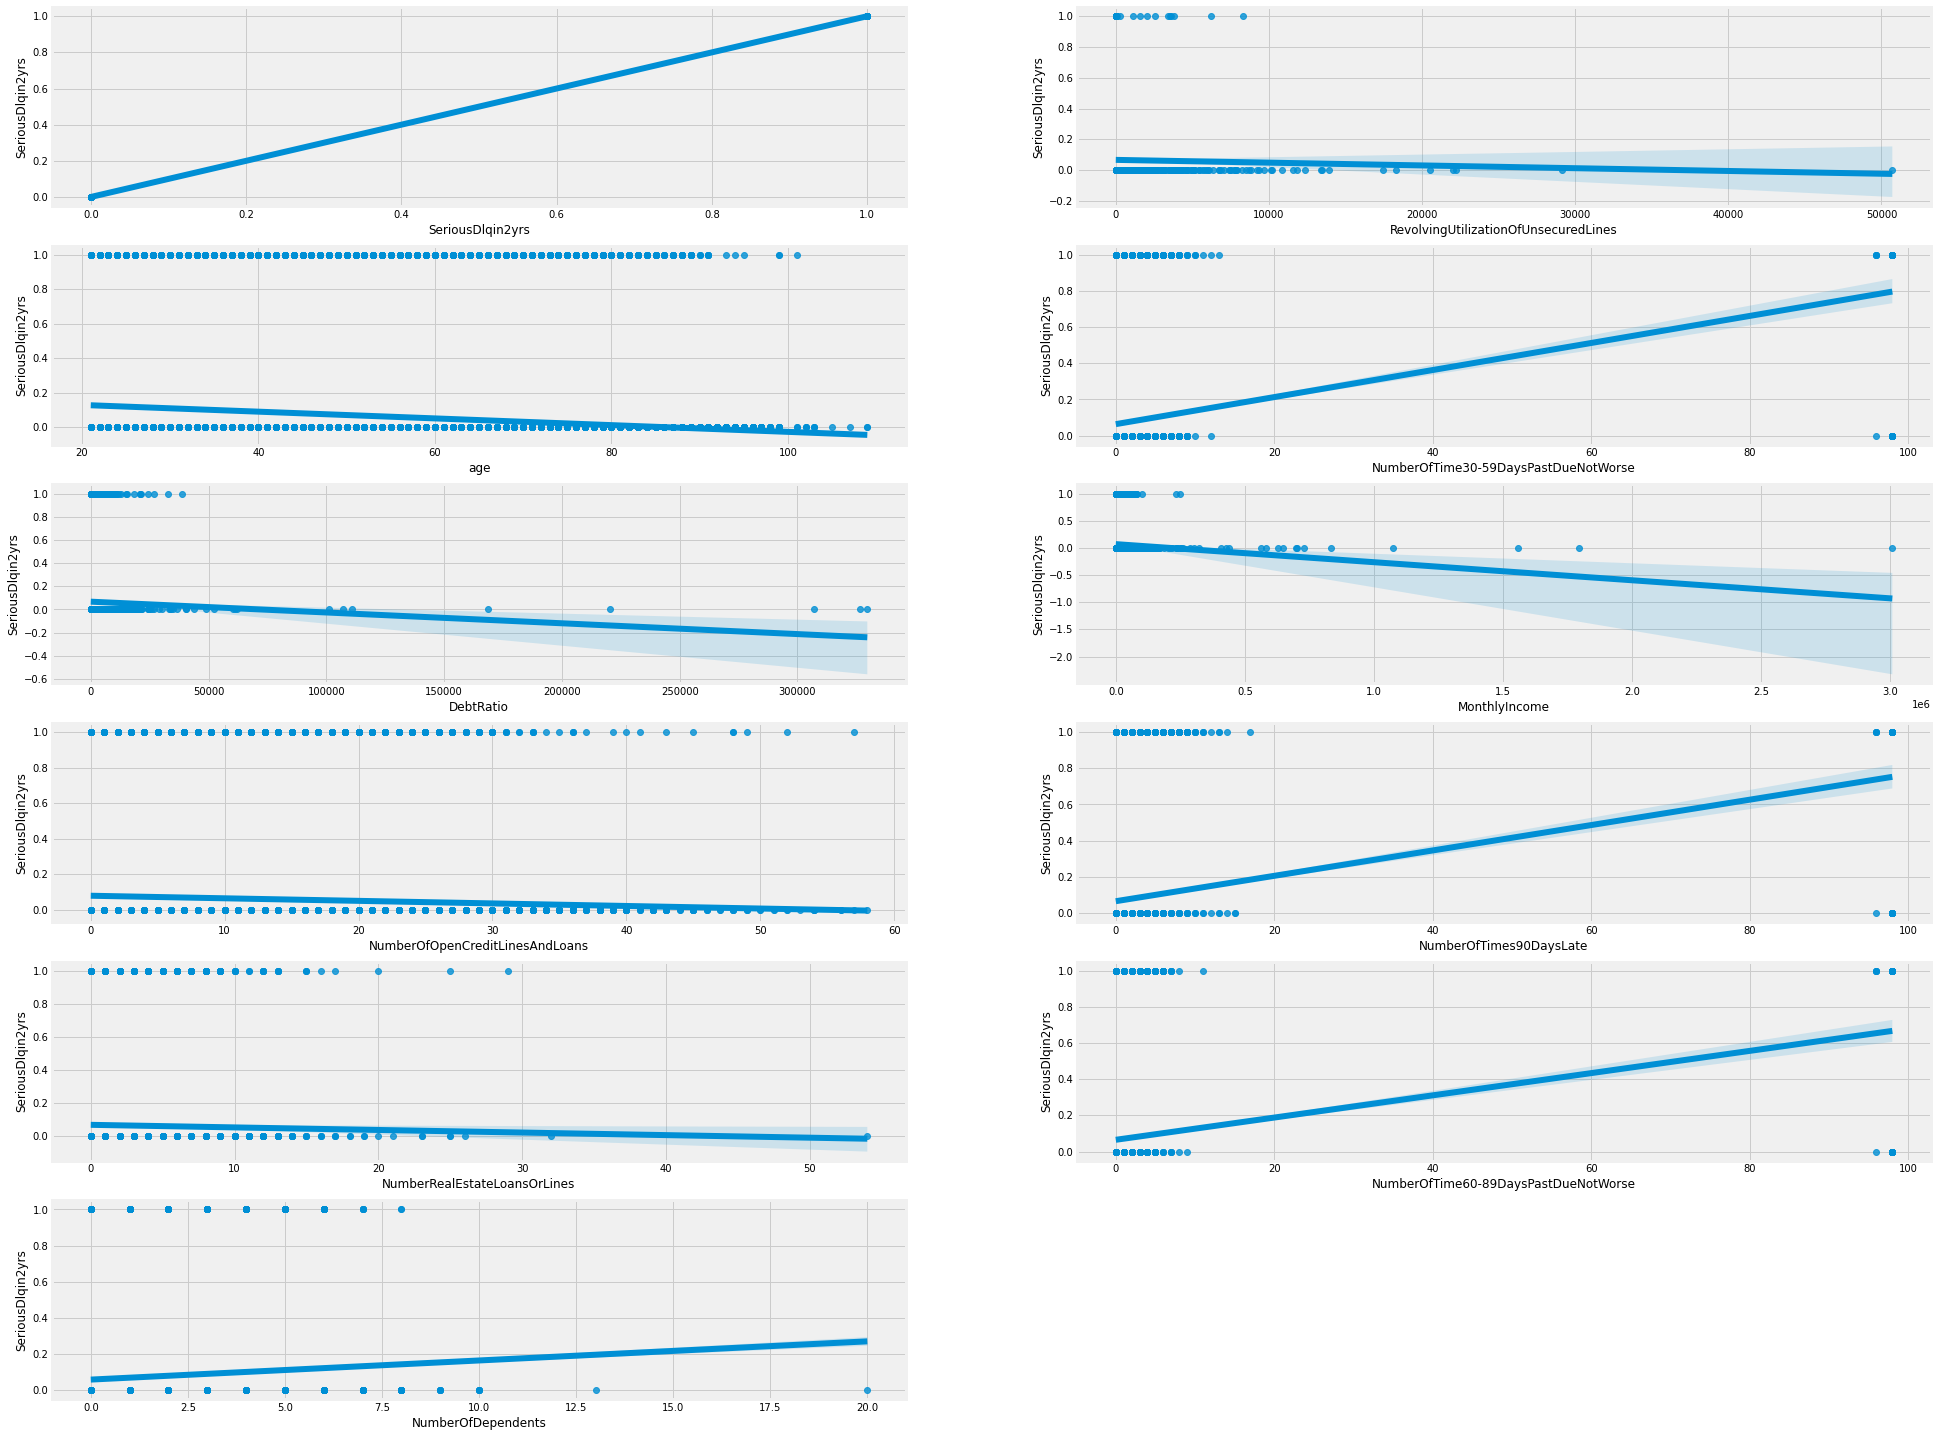

In [ ]:
fig = plt.figure(figsize=[30,30])
for col,i in zip(df.columns, range(1,12)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(df[col], df.SeriousDlqin2yrs, ax=axes)
plt.show()

1. **In the columns NumberOfTime30-59DaysPastDueNotWorse , NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate, we see delinquency range beyond 90 which is common across all 3 features.**
2. **There are some unusually high values for DebtRatio and RevolvingUtilizationOfUnsecuredLines.**
3. **age variable has outliers.**

In [ ]:
#Removing outliers from the age
index = df[(df['age'] >= 85)|(df['age'] <= 18)].index
df.drop(index, inplace=True)
df['age'].describe()

count    147477.000000
mean         51.680811
std          14.117142
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          84.000000
Name: age, dtype: float64

In [ ]:
df['NumberOfTimes90DaysLate'].value_counts().sort_index(ascending=False)

98       264
96         5
17         1
15         2
14         2
13         4
12         2
11         5
10         8
9         19
8         21
7         38
6         80
5        130
4        290
3        662
2       1550
1       5218
0     139176
Name: NumberOfTimes90DaysLate, dtype: int64

In [ ]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index(ascending=False)

98       264
96         5
13         1
12         2
11         1
10         4
9         12
8         25
7         53
6        140
5        339
4        744
3       1744
2       4576
1      15894
0     123673
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index(ascending=False)

98       264
96         5
11         1
9          1
8          2
7          9
6         16
5         33
4        105
3        317
2       1115
1       5690
0     139919
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
df[df['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate',
                                               'NumberOfTime30-59DaysPastDueNotWorse',
                                               'NumberOfTime60-89DaysPastDueNotWorse']]

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
...,...,...,...
147774,98,98,98
149153,98,98,98
149239,98,98,98
149439,98,98,98


**These points seem to be 96 and 98. They show up 269 times in total in each "NumberPastDue" feature**

In [ ]:
df[df['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate',
                                               'NumberOfTime30-59DaysPastDueNotWorse',
                                               'NumberOfTime60-89DaysPastDueNotWorse']].drop_duplicates()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
41944,96,96,96


**They are definitely outliers. Once one of the three features has one of these two values, the other features get the same outlier value.**

**Next, we will create a binary feature WithDependents which is derived from the NumberOfDependents feature. Also, from the description of the data DebtRatio = Monthly debt payments / monthly gross income. we will extract MonthlyDebtPayments from this formula to get a new feature.**

In [ ]:
df["WithDependents"] = df["NumberOfDependents"]
df.loc[(df["WithDependents"] >= 1), "WithDependents"] = 1
df.WithDependents.value_counts()

0.0    88497
1.0    58980
Name: WithDependents, dtype: int64

In [ ]:
df["MonthlyDebtPayments"] = df["DebtRatio"] * df["MonthlyIncome"]
df["MonthlyDebtPayments"] = np.absolute(df["MonthlyDebtPayments"])
df["MonthlyDebtPayments"] = df["MonthlyDebtPayments"].astype('int64')

In [ ]:
df["Total_defaulters"] = (df["NumberOfTimes90DaysLate"] + df["NumberOfTime60-89DaysPastDueNotWorse"] + df["NumberOfTime30-59DaysPastDueNotWorse"])
df.loc[(df["Total_defaulters"] >= 1), "Total_defaulters"] = 1  
df["CombinedCreditLoans"] = df["NumberOfOpenCreditLinesAndLoans"] + df["NumberRealEstateLoansOrLines"]
df.loc[(df["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
df.loc[(df["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1
df.head(8)                               

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,WithDependents,MonthlyDebtPayments,Total_defaulters,CombinedCreditLoans
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1.0,7323,1,1
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,1.0,316,0,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.0,258,1,0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.0,118,0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.0,1584,1,1
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,1.0,1314,0,0
6,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0,0.0,30834000,0,1
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0.0,734,0,1


#### Calculate the correlation and plot the heatmap

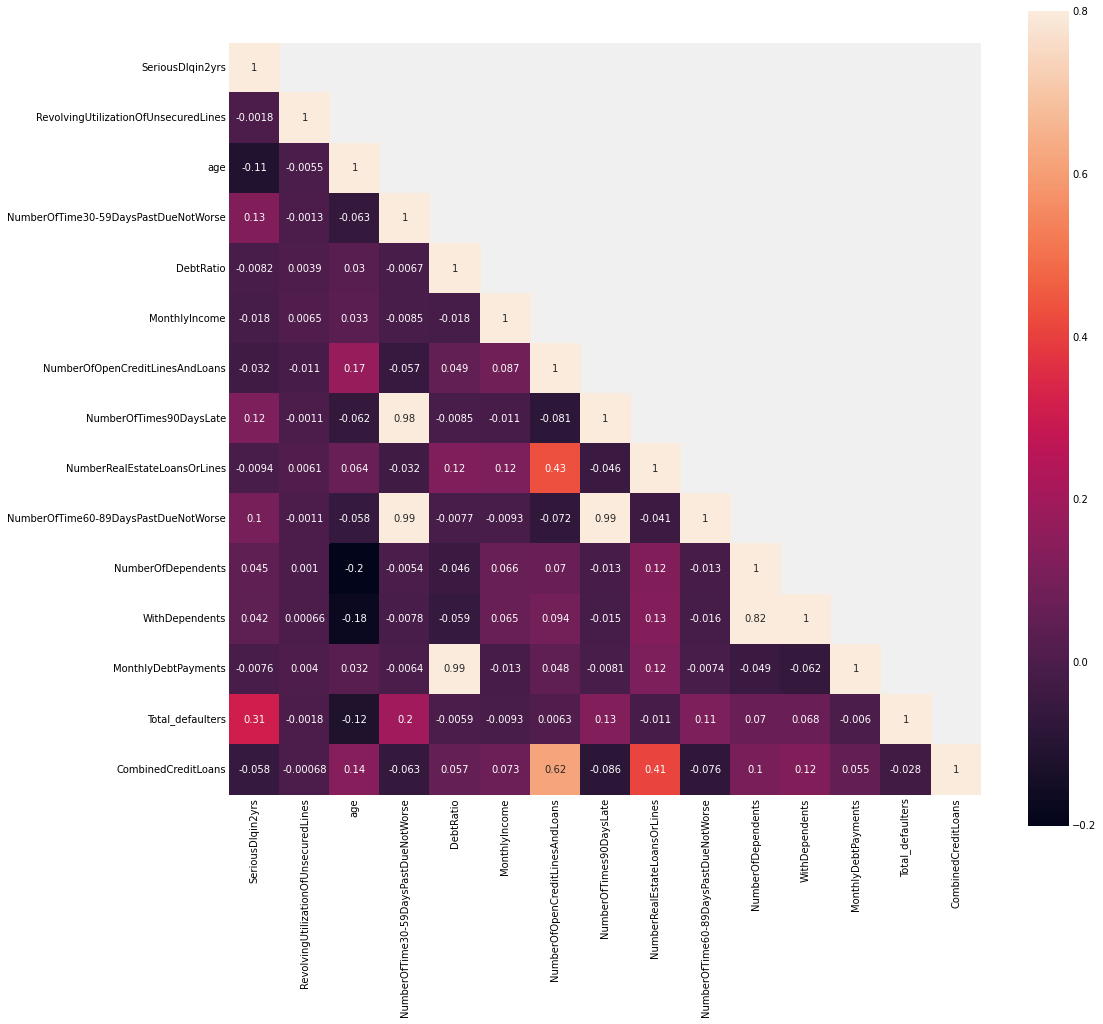

In [ ]:
CorrMat = df.corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(CorrMat,mask=mask,
          vmax=0.8,square=True,annot=True,ax=ax)

1. **We will retain CombinedDefaulted feature as it clearly a good predictor of our target class than the three features it was derived from.**
2. **We will retain NumberOfTime30-59DaysPastDueNotWorse and drop the other two features derived from CombinedDefaulted as it gives a more meaningful information on our target variable (also, it looks like this is the medium range of time a borrower defaulted a payment)**
3. **We will drop also the WithDependents**
4. **We will retain CombinedCreditLoans also since it outperforms the two features it came from.**
5. **We will drop MonthlyDebtPayments**

In [ ]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'Total_defaulters', 'CombinedCreditLoans'],
      dtype='object')

In [ ]:
df.drop(["NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",
         "WithDependents", "MonthlyDebtPayments"], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'Total_defaulters', 'CombinedCreditLoans'],
      dtype='object')

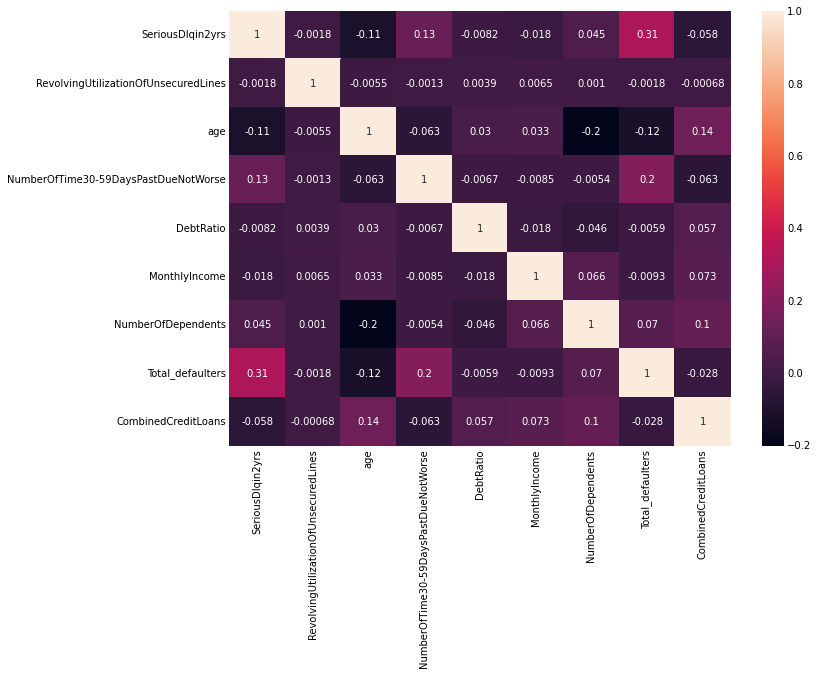

In [ ]:
#now let's take a look at the filtered final features to be used in predicting the financial distress for the next two years
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

In [ ]:
df.shape

(147477, 9)

### Data Engineering

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'Total_defaulters', 'CombinedCreditLoans'],
      dtype='object')

In [ ]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
X = pd.DataFrame(df, columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'Total_defaulters', 'CombinedCreditLoans'])
y = np.array(df['SeriousDlqin2yrs'])
X, y

(        RevolvingUtilizationOfUnsecuredLines  ...  CombinedCreditLoans
 0                                   0.766127  ...                    1
 1                                   0.957151  ...                    0
 2                                   0.658180  ...                    0
 3                                   0.233810  ...                    0
 4                                   0.907239  ...                    1
 ...                                      ...  ...                  ...
 149995                              0.040674  ...                    0
 149996                              0.299745  ...                    0
 149997                              0.246044  ...                    1
 149998                              0.000000  ...                    0
 149999                              0.850283  ...                    1
 
 [147477 rows x 8 columns], array([1, 0, 0, ..., 0, 0, 0], dtype=int64))

In [ ]:
clf.fit(X, y)
output_bins = clf.bins
output_bins
#Where X is the set of features(of which you want to replace by woe values) as pandas Dataframe and y is the target variable in form of an array

{'CombinedCreditLoans': array([0., 1.]),
 'DebtRatio': array([0.00000000e+00, 2.40826197e-01, 5.68817579e-01, 3.29664000e+05]),
 'MonthlyIncome': array([      0.,    4700.,    6200., 3008750.]),
 'NumberOfDependents': array([ 0.,  1., 20.]),
 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.67978967e-02, 3.87476906e-01, 5.07080000e+04]),
 'Total_defaulters': array([0., 1.]),
 'age': array([21., 45., 58., 84.])}

In [ ]:
Bins = clf.transform(X) # store the bins in a separate dataset with the same column names:
Bins.head(8)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfDependents,Total_defaulters,CombinedCreditLoans
0,"(0.387, 50708.0]","(20.999, 45.0]","(1.0, 98.0]","(0.569, 329664.0]","(6200.0, 3008750.0]","(1.0, 20.0]",1,1
1,"(0.387, 50708.0]","(20.999, 45.0]","(-0.001, 1.0]","(-0.001, 0.241]","(-0.001, 4700.0]","(-0.001, 1.0]",0,0
2,"(0.387, 50708.0]","(20.999, 45.0]","(-0.001, 1.0]","(-0.001, 0.241]","(-0.001, 4700.0]","(-0.001, 1.0]",1,0
3,"(0.0568, 0.387]","(20.999, 45.0]","(-0.001, 1.0]","(-0.001, 0.241]","(-0.001, 4700.0]","(-0.001, 1.0]",0,0
4,"(0.387, 50708.0]","(45.0, 58.0]","(-0.001, 1.0]","(-0.001, 0.241]","(6200.0, 3008750.0]","(-0.001, 1.0]",1,1
5,"(0.0568, 0.387]","(58.0, 84.0]","(-0.001, 1.0]","(0.241, 0.569]","(-0.001, 4700.0]","(-0.001, 1.0]",0,0
6,"(0.0568, 0.387]","(45.0, 58.0]","(-0.001, 1.0]","(0.569, 329664.0]","(4700.0, 6200.0]","(-0.001, 1.0]",0,1
7,"(0.387, 50708.0]","(20.999, 45.0]","(-0.001, 1.0]","(-0.001, 0.241]","(-0.001, 4700.0]","(-0.001, 1.0]",0,1


In [ ]:
Bins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147477 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines  147477 non-null  category
 1   age                                   147477 non-null  category
 2   NumberOfTime30-59DaysPastDueNotWorse  147477 non-null  category
 3   DebtRatio                             147477 non-null  category
 4   MonthlyIncome                         147477 non-null  category
 5   NumberOfDependents                    147477 non-null  category
 6   Total_defaulters                      147477 non-null  int64   
 7   CombinedCreditLoans                   147477 non-null  int64   
dtypes: category(6), int64(2)
memory usage: 9.2 MB


In [ ]:
from xverse.transformer import WOE
clf1 = WOE()
clf1.fit(X, y)
print(clf1.woe_df.head(10)) #Weight of Evidence transformation datas

         Variable_Name             Category  ...       WOE  Information_Value
0  CombinedCreditLoans                    0  ...  0.342440           0.048969
1  CombinedCreditLoans                    1  ... -0.143587           0.048969
2            DebtRatio      (-0.001, 0.241]  ... -0.104641           0.012902
3            DebtRatio       (0.241, 0.569]  ... -0.062995           0.012902
4            DebtRatio    (0.569, 329664.0]  ...  0.151097           0.012902
5        MonthlyIncome     (-0.001, 4700.0]  ...  0.301816           0.064515
6        MonthlyIncome     (4700.0, 6200.0]  ... -0.079289           0.064515
7        MonthlyIncome  (6200.0, 3008750.0]  ... -0.308406           0.064515
8   NumberOfDependents        (-0.001, 1.0]  ... -0.085549           0.021971
9   NumberOfDependents          (1.0, 20.0]  ...  0.257288           0.021971

[10 rows x 11 columns]


In [ ]:
print(clf1.iv_df.head(11)) #Information value dataset

                          Variable_Name  Information_Value
6                      Total_defaulters           1.165505
5  RevolvingUtilizationOfUnsecuredLines           0.936645
4  NumberOfTime30-59DaysPastDueNotWorse           0.468103
7                                   age           0.206937
2                         MonthlyIncome           0.064515
0                   CombinedCreditLoans           0.048969
3                    NumberOfDependents           0.021971
1                             DebtRatio           0.012902


In [ ]:
WOE = clf1.transform(X)
WOE

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfDependents,Total_defaulters,CombinedCreditLoans
0,0.916954,0.402292,1.888522,0.151097,-0.308406,0.257288,1.376184,-0.143587
1,0.916954,0.402292,-0.257424,-0.104641,0.301816,-0.085549,-0.935624,0.342440
2,0.916954,0.402292,-0.257424,-0.104641,0.301816,-0.085549,1.376184,0.342440
3,-0.798226,0.402292,-0.257424,-0.104641,0.301816,-0.085549,-0.935624,0.342440
4,0.916954,0.051175,-0.257424,-0.104641,-0.308406,-0.085549,1.376184,-0.143587
...,...,...,...,...,...,...,...,...
149995,-1.393758,-0.757954,-0.257424,-0.104641,0.301816,-0.085549,-0.935624,0.342440
149996,-0.798226,0.402292,-0.257424,0.151097,-0.079289,0.257288,-0.935624,0.342440
149997,-0.798226,0.051175,-0.257424,0.151097,-0.079289,-0.085549,-0.935624,-0.143587
149998,-1.393758,0.402292,-0.257424,-0.104641,-0.079289,-0.085549,-0.935624,0.342440


### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE
#features = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome']
features = ['Total_defaulters', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'age']      

target = ['SeriousDlqin2yrs']
X = WOE[features]
y = df[target]
X.shape, y.shape

((147477, 4), (147477, 1))

In [ ]:
X

,Total_defaulters,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age
0,1.376184,0.916954,1.888522,0.402292
1,-0.935624,0.916954,-0.257424,0.402292
2,1.376184,0.916954,-0.257424,0.402292
3,-0.935624,-0.798226,-0.257424,0.402292
4,1.376184,0.916954,-0.257424,0.051175
...,...,...,...,...
149995,-0.935624,-1.393758,-0.257424,-0.757954
149996,-0.935624,-0.798226,-0.257424,0.402292
149997,-0.935624,-0.798226,-0.257424,0.051175
149998,-0.935624,-1.393758,-0.257424,0.402292


### Implement the Logistic regression using sklearn

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

In [ ]:
# With weightage
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logit = LogisticRegression(random_state = 42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=500)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_test)

**Since we have a vast amount of data, we will use solver="saga" from logit and apply preprocessing of the input data using StandardScaler. class_weight="balanced" and a regularization param C to the default value of 1**

In [ ]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [ ]:
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8394101767941247


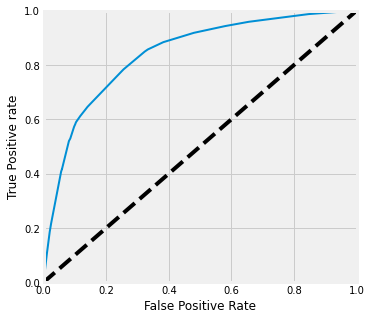

In [ ]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

Validation set AUC Score 0.8333067278813335


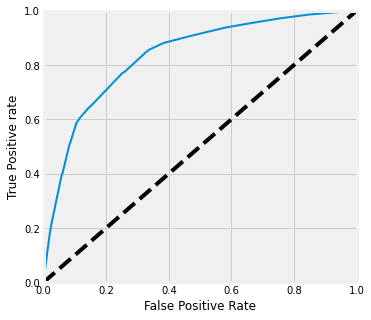

In [ ]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("Validation set AUC Score {}".format(roc_auc_score(y_test,logit_scores_val)))

In [ ]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
y_pred = logit.predict(X_val_scaled)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))

Accuracy Score is 0.8429617575264443


AUC Score 0.8385479445507028
Validation set AUC Score 0.8326558982314358
Accuracy Score is 0.9326281529698942
R Squared = -0.07223870179724323
MAE = 0.06737184703010578
MSE = 0.06737184703010578


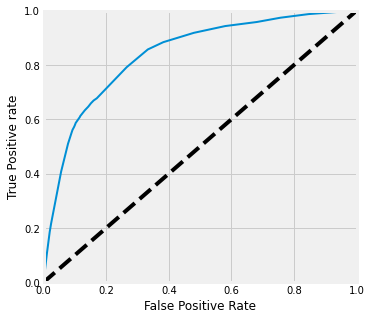

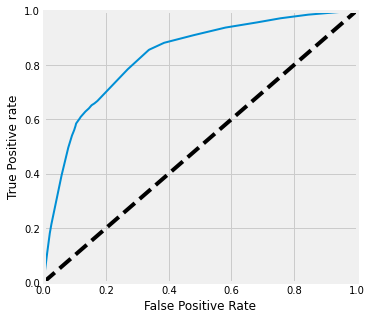

In [ ]:
# Without weightage
# YOUR CODE HERE
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, random_state = 42)
logit_unbalanced = LogisticRegression(random_state = 42, solver="saga", penalty="l1", C=0.001, max_iter=500)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_test1)
logit_unbalanced.fit(X_train_scaled, y_train)
logit_scores_proba = logit_unbalanced.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))
#validate with the validation set
logit_scores_proba_val = logit_unbalanced.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test1, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("Validation set AUC Score {}".format(roc_auc_score(y_test1,logit_scores_val)))
y_pred1 = logit_unbalanced.predict(X_val_scaled)
print ('Accuracy Score is',accuracy_score(y_test1, y_pred1))
print ('R Squared =',r2_score(y_test1, y_pred1))
print ('MAE =',mean_absolute_error(y_test1, y_pred1))
print ('MSE =',mean_squared_error(y_test1, y_pred1))

In [ ]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfDependents,Total_defaulters,CombinedCreditLoans
0,1,0.766127,45,2,0.802982,9120.0,2.0,1,1
1,0,0.957151,40,0,0.121876,2600.0,1.0,0,0
2,0,0.658180,38,1,0.085113,3042.0,0.0,1,0
3,0,0.233810,30,0,0.036050,3300.0,0.0,0,0
4,0,0.907239,49,1,0.024926,63588.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,0.0,0,0
149996,0,0.299745,44,0,0.716562,5584.0,2.0,0,0
149997,0,0.246044,58,0,3870.000000,5400.0,0.0,0,1
149998,0,0.000000,30,0,0.000000,5716.0,0.0,0,0


Logistic Regression without WOE
AUC Score 0.8021960432062019
Validation set AUC Score 0.7941847424517319
Accuracy Score is 0.9326281529698942
R Squared = -0.07223870179724323
MAE = 0.06737184703010578
MSE = 0.06737184703010578


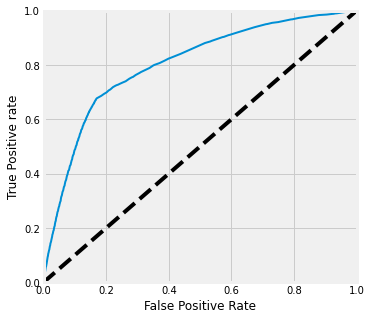

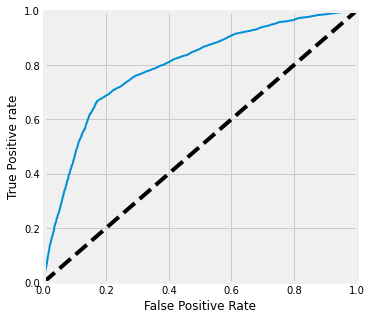

In [ ]:
print("Logistic Regression without WOE")
features1 = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'Total_defaulters', 'CombinedCreditLoans']
target1 = ['SeriousDlqin2yrs']
X1 = df[features1]
y1 = df[target1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, random_state = 42)
logit_without_woe = LogisticRegression(random_state = 42, solver="saga", penalty="l1", C=0.001, max_iter=500)
scaler = StandardScaler().fit(X_train2)
X_train_scaled2 = scaler.transform(X_train2) #scaling features!
X_val_scaled2 = scaler.transform(X_test2)
logit_without_woe.fit(X_train_scaled2, y_train2)
logit_scores_proba = logit_without_woe.predict_proba(X_train_scaled2)
logit_scores2 = logit_scores_proba[:,1]
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train2, logit_scores2)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train2,logit_scores2)))
#validate with the validation set
logit_scores_proba_val = logit_without_woe.predict_proba(X_val_scaled2)
logit_scores_val2 = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test2, logit_scores_val2)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("Validation set AUC Score {}".format(roc_auc_score(y_test2, logit_scores_val2)))
y_pred2 = logit_without_woe.predict(X_val_scaled2)
print ('Accuracy Score is',accuracy_score(y_test2, y_pred2))
print ('R Squared =',r2_score(y_test2, y_pred2))
print ('MAE =',mean_absolute_error(y_test2, y_pred2))
print ('MSE =',mean_squared_error(y_test2, y_pred2))
#print('Misclassified samples: %d' % (y_test2 != y_pred2).sum())

### Credit scoring

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
features = ['Total_defaulters', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'age']
woe_df = clf1.woe_df
tempdf = woe_df.loc[(woe_df['Variable_Name'] == 'Total_defaulters') | (woe_df['Variable_Name'] == 'RevolvingUtilizationOfUnsecuredLines') |(woe_df['Variable_Name'] == 'NumberOfTime30-59DaysPastDueNotWorse')|(woe_df['Variable_Name'] == 'age')]
tempdf = tempdf[['Variable_Name','WOE']]
tempdf

,Variable_Name,WOE
10,NumberOfTime30-59DaysPastDueNotWorse,-0.257424
11,NumberOfTime30-59DaysPastDueNotWorse,1.888522
12,RevolvingUtilizationOfUnsecuredLines,-1.393758
13,RevolvingUtilizationOfUnsecuredLines,-0.798226
14,RevolvingUtilizationOfUnsecuredLines,0.916954
15,Total_defaulters,-0.935624
16,Total_defaulters,1.376184
17,age,0.402292
18,age,0.051175
19,age,-0.757954


In [ ]:
coe = (logit.coef_)[0]
woe_Total_defaulters = [-0.935624,1.376184]
woe_age = [0.402292,0.051175,-0.757954]
woe_RevolvingUtilizationOfUnsecuredLines = [-1.393758,-0.798226,0.916954]
woe_NumberOfTime30 =[-0.257424,1.888522]

In [ ]:
import math

n = len(features)
a = logit.intercept_/n
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))

def get_score(coe, woe, p = factor, q = offset):
    scores = 0
    for w in woe:
      score = -((coe*w) + a)*p + (q/n)
      scores += score
    return scores

x1 = get_score(coe[0], woe_Total_defaulters, factor,offset)
x2 = get_score(coe[1], woe_age, factor)
x3 = get_score(coe[2], woe_RevolvingUtilizationOfUnsecuredLines, factor)
x4 = get_score(coe[3], woe_NumberOfTime30, factor)

print("Score for Total_defaulters",x1)
print("Score for age",x2)
print("Score for RevolvingUtilizationOfUnsecuredLines",x3)
print("Score for NumberOfTime30-59DaysPastDueNotWorse",x4)

Score for Total_defaulters [245.99063682]
Score for age [387.9707564]
Score for RevolvingUtilizationOfUnsecuredLines [390.73941184]
Score for NumberOfTime30-59DaysPastDueNotWorse [245.45518336]


### Performance Metrics

#### Precision

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.245


#### Recall

In [ ]:
# YOUR CODE HERE
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.640


#### Classification Report

In [ ]:
# YOUR CODE HERE
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     34386
           1       0.25      0.64      0.35      2484

    accuracy                           0.84     36870
   macro avg       0.61      0.75      0.63     36870
weighted avg       0.92      0.84      0.87     36870



#### Confusion matrix

In [ ]:
# YOUR CODE HERE
confusion_matrix(y_test, y_pred)

array([[29490,  4896],
       [  894,  1590]])

In [ ]:
print("Without WOE")
precision = precision_score(y_test2, y_pred2, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_test2, y_pred2, average='binary')
print('Recall: %.3f' % recall)
print ('Classification Report : ')
print (classification_report(y_test2, y_pred2))
confusion_matrix(y_test2, y_pred2)

Without WOE
Precision: 0.000
Recall: 0.000
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     34386
           1       0.00      0.00      0.00      2484

    accuracy                           0.93     36870
   macro avg       0.47      0.50      0.48     36870
weighted avg       0.87      0.93      0.90     36870



array([[34386,     0],
       [ 2484,     0]])

### Report Analysis



**Comment on the performance of the model with weightage and without weightage**
*In general, weighting causes models to perform worse overall but causes them to perform better on certain segments of the population. In the case of fraud, the missing piece from the above argument is that failing to catch fraud is usually more expensive than falsely flagging non-fraudulent transactions.*

What we really want to talk about as a good reason for weighting is cost-sensitive classification. Some examples:

1. In fraud detection, false negatives tend to cost more than false positives
2. In credit lending, defaults tend to be more expensive than rejected loans that would not have defaulted*
Both of these are only true within reason. You can’t go all the way to the extreme, because flagging every transaction as fraudulent or rejecting all loan applications, are all clearly bad business decisions. **But the point is, certain kinds of misclassification are more expensive than other kinds of misclassification, so we might want to influence our model to make decisions that are wrong more often, but still less expensive overall. Using weighting is a reasonable tool to help solve this problem.**

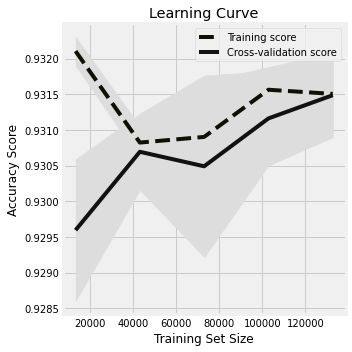

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import learning_curve

estimator = LogisticRegression()
# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X1, y1, cv= 10, scoring='accuracy')

    # Creating means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Creating means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111000",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

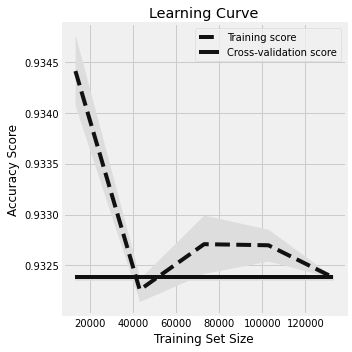

In [ ]:
estimator = LogisticRegression()
# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv= 10, scoring='accuracy')

    # Creating means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

    # Creating means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()